## Project 5: WAM News Prediction of  California's Gubernatorial 2021 Election

## Import Libraries

In [37]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
# sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
# keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Recall
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# set random seed
import random
random.seed=42

## Load Data

In [38]:
# read data
df=pd.read_csv('./data/2018_gov_clean1.csv', index_col=0)
df.head()

,dist,ownhome,pid3,gender,age,educ,race,faminc,marstat,newsint,approval_gov,ideo5,voted_gov
392782,19,Other,Democrat,Female,54,4-Year,White,50k - 60k,Single / Never Married,Most of the time,Strongly Approve,Liberal,1
392786,52,Rent,Democrat,Female,28,Some College,White,20k - 30k,Single / Never Married,Most of the time,Strongly Approve,Liberal,1
392800,49,Own,Other,Male,86,Post-Grad,White,120k - 150k,Widowed,Most of the time,Strongly Disapprove,Very Conservative,0
392832,36,Own,Republican,Male,80,Some College,White,20k - 30k,Widowed,Most of the time,Strongly Disapprove,Conservative,0
392860,36,Own,Independent,Male,83,4-Year,White,Prefer not to say,Married,Most of the time,Strongly Disapprove,Conservative,0


In [39]:
# check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3663 entries, 392782 to 452724
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dist          3663 non-null   int64 
 1   ownhome       3663 non-null   object
 2   pid3          3663 non-null   object
 3   gender        3663 non-null   object
 4   age           3663 non-null   int64 
 5   educ          3663 non-null   object
 6   race          3663 non-null   object
 7   faminc        3663 non-null   object
 8   marstat       3663 non-null   object
 9   newsint       3663 non-null   object
 10  approval_gov  3663 non-null   object
 11  ideo5         3663 non-null   object
 12  voted_gov     3663 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 400.6+ KB


In [40]:
# baseline accuracy
df.voted_gov.value_counts(normalize=True)

1    0.624352
0    0.375648
Name: voted_gov, dtype: float64

# Modeling

In [57]:
# set up X and y
X = df.drop(columns =['voted_gov'])
y = df['voted_gov']

In [58]:
# dummify X variable
X = pd.get_dummies(X, drop_first=True)

In [59]:
# checkout X shape
X.shape

(3663, 51)

In [60]:
# check if shape of X = y
assert X.shape[0]==y.shape[0]

In [61]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### 2. Neural Nets GridSearch

In [62]:
# scale data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [63]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_shape=(51,), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) 
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
params_grid = {
    'batch_size': [10, 20, 40, 60, 80, 100],
    'epochs': [10, 50, 100],
}

gs_deep = GridSearchCV(model, param_grid=params_grid, cv=3, n_jobs=-1)
gs_deep.fit(
    X_train_sc, 
    y_train, 
    callbacks=early_stop, 
    validation_data=(X_test_sc, y_test))
print(gs_deep.best_params_)
gs_deep.best_score_

Epoch 00015: early stopping
{'batch_size': 100, 'epochs': 50}


0.9257367451985677

In [67]:
# Make predictions 
preds_deep = gs_deep.predict(X_test_sc)

In [66]:
## classification report
print(classification_report(y_test, preds_deep))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       344
           1       0.93      0.96      0.94       572

    accuracy                           0.92       916
   macro avg       0.92      0.91      0.92       916
weighted avg       0.92      0.92      0.92       916



In [70]:


# save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_deep).ravel()

In [71]:
# metrics
accu = (tp+tn) / (tp+tn+fp+fn)
recall = tp/(tp+fn)
prec = tp/ (tp+fp)
spec= tn/(tn+fp)

print('Accuracy:', accu)
print('Recall:', recall)
print('Precision:', prec)
print('Specificity:', spec)

Accuracy: 0.9246724890829694
Recall: 0.9562937062937062
Precision: 0.9255499153976311
Specificity: 0.872093023255814


### 2. Neural Net Classification - Early stopping

In [ ]:
# set a random seed
tf.random.set_seed(1234)

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
# scale data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
# create model with one hidden layer
model_nn1 = Sequential()
model_nn1.add(Dense(32, input_shape=(X_train_sc.shape[1],), activation='relu'))
model_nn1.add(Dense(1, activation='sigmoid'))

In [ ]:
model_nn1.summary()

In [ ]:
# Compile it
model_nn1.compile(loss='bce', optimizer='adam', metrics=['Accuracy', 'Recall', 'Precision'])

In [ ]:
# set early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [ ]:
# fit model
history = model_nn1.fit(
    X_train_sc, y_train, 
    validation_data=(X_test_sc, y_test), 
    epochs=100, 
    callbacks=[early_stop], 
    verbose=2,
    batch_size=32
)

In [ ]:
# save history into a df
history_df = pd.DataFrame(history.history)
history_df.head()

In [ ]:
# subplots of accuracy, precision and recall
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols=3, figsize = (20, 7))
fig.suptitle('Accuracy, Precision and Recall Plot of Neural Net Model')

# axis 1
ax1.plot(history_df['val_Accuracy'], label='Validation Accuracy', color='green')
ax1.plot(history_df['Accuracy'], label='Training Accuracy', color='orange')
ax1.legend(loc="upper left")
# axis 2
ax2.plot(history_df['val_precision'], label='Validation Precision', color='green')
ax2.plot(history_df['precision'], label='Training Precision', color='orange')
ax2.legend(loc="upper left")
#axis3
ax3.plot(history_df['val_recall'], label='Validation Recall', color='green')
ax3.plot(history_df['recall'], label='Training Recall', color='orange')
ax3.legend(loc="upper right")

plt.legend();

The plots show that this model with one hidden layer and early stopping is slightly overfit. 

In [ ]:
# evaluate model
model_nn1.evaluate(X_test_sc, y_test, verbose=2)

In [ ]:
# make predictions
y_pred_nn1=model_nn1.predict(X_test_sc)
y_pred_nn1[:10]

In [ ]:
# round predicted values
y_pred_nn1 =y_pred_nn1.round()
y_pred_nn1[:10]

In [ ]:
# confusion matrix using Tensorflow
tf.math.confusion_matrix(
    y_test, y_pred_nn1
)

In [ ]:
# classification report
print(classification_report(y_test, y_pred_nn1))

On test data: 
- accuracy: 0.9108 
- recall: 0.8667 
- precision: 0.8925

On train data:
- accuracy: 0.9373 
- recall: 0.8888 
- precision: 0.9406

This model has an accuracy of 91% which improved the null model accuracy of 38%.  

### 3. Neural Net Classification - 2 hidden layers & dropout

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [73]:
# scale data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [74]:
model_nn2 = Sequential()

In [75]:
# create model
model_nn2.add(Dense(32, input_shape=(X_train_sc.shape[1],), activation='relu'))
model_nn2.add(Dropout(0.2))
model_nn2.add(Dense(10, activation='relu'))
model_nn2.add(Dropout(0.2))
model_nn2.add(Dense(1, activation='sigmoid'))

In [76]:
# compile model
model_nn2.compile(loss='bce', optimizer ='adam', metrics = ['Accuracy', 'Recall', 'Precision'])

In [77]:
# fit model
history_2 = model_nn2.fit(
    X_train_sc,
    y_train,
    validation_data=(X_test_sc, y_test),
    epochs=100,
    verbose=0
)

In [78]:
# save history into a df
history_2_df = pd.DataFrame(history_2.history)
history_2_df.head()

,loss,Accuracy,recall,precision,val_loss,val_Accuracy,val_recall,val_precision
0,0.699123,0.593739,0.742857,0.653669,0.593318,0.733624,0.926573,0.724044
1,0.515705,0.773935,0.910204,0.769724,0.408474,0.862445,0.952797,0.846273
2,0.345632,0.863487,0.927114,0.864130,0.277278,0.895196,0.952797,0.887622
3,0.268932,0.895522,0.941108,0.896667,0.235286,0.907205,0.944056,0.910624
4,0.237636,0.911904,0.942274,0.918704,0.227249,0.912664,0.961538,0.904605


In [79]:
history_2_df['val_Accuracy'][5:]

5     0.921397
6     0.914847
7     0.919214
8     0.919214
9     0.921397
        ...   
95    0.923581
96    0.925764
97    0.924672
98    0.923581
99    0.924672
Name: val_Accuracy, Length: 95, dtype: float64

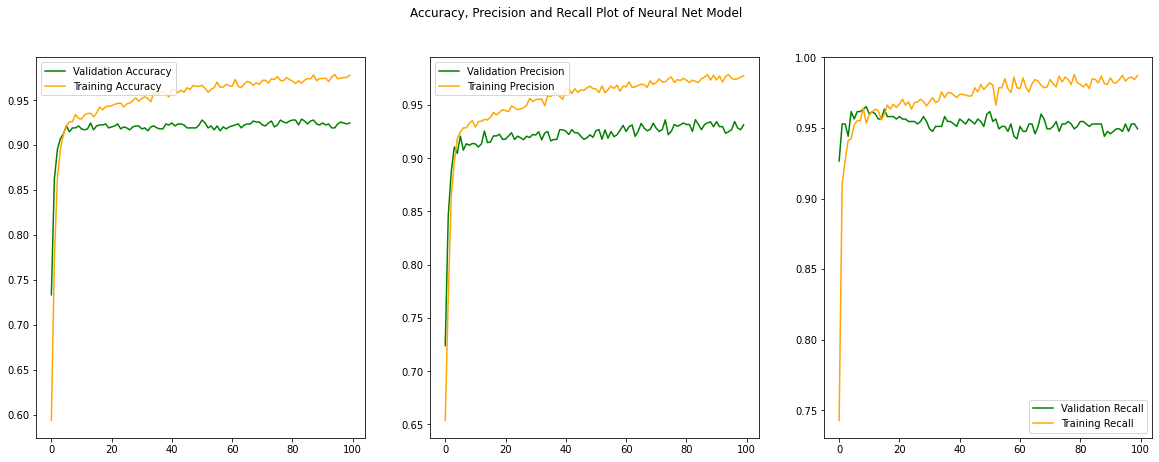

In [80]:
# subplots of accuracy, precision and recall
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols=3, figsize = (20, 7))
fig.suptitle('Accuracy, Precision and Recall Plot of Neural Net Model')

# axis 1 - accuracy
ax1.plot(history_2_df["val_Accuracy"], label='Validation Accuracy', color='green')
ax1.plot(history_2_df["Accuracy"], label='Training Accuracy', color='orange')
ax1.legend(loc="upper left")
# axis 2 - precision
ax2.plot(history_2_df['val_precision'], label='Validation Precision', color='green')
ax2.plot(history_2_df['precision'], label='Training Precision', color='orange')
ax2.legend(loc="upper left")
# axis3 - recall
ax3.plot(history_2_df['val_recall'], label='Validation Recall', color='green')
ax3.plot(history_2_df['recall'], label='Training Recall', color='orange')
ax3.legend(loc="upper right")

plt.legend();

In [81]:
# evaluate model
model_nn2.evaluate(X_test_sc, y_test, verbose=2)

29/29 - 0s - loss: 0.4469 - Accuracy: 0.9247 - recall: 0.9493 - precision: 0.9314


[0.4469311833381653,
 0.9246724843978882,
 0.9493007063865662,
 0.9313893914222717]

In [82]:
# make predictions
y_pred_nn2=model_nn2.predict(X_test_sc)
y_pred_nn2[:10]

array([[9.5918524e-01],
       [8.7207192e-01],
       [3.0676232e-11],
       [9.9988604e-01],
       [4.5425224e-01],
       [9.9928343e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.7285312e-07],
       [1.0000000e+00]], dtype=float32)

In [83]:
# round predicted values
y_pred_nn2 =y_pred_nn2.round()
y_pred_nn2[:10]

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [84]:
# confusion matrix using Tensorflow
tf.math.confusion_matrix(
    y_test, y_pred_nn2
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[304,  40],
       [ 29, 543]], dtype=int32)>

In [85]:
# classification report
print(classification_report(y_test, y_pred_nn2))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       344
           1       0.93      0.95      0.94       572

    accuracy                           0.92       916
   macro avg       0.92      0.92      0.92       916
weighted avg       0.92      0.92      0.92       916



### 4. Neural Net Classification - Early stopping & dropout

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [87]:
# scale data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [88]:
model_nn3 = Sequential()

In [89]:
# create model
model_nn3.add(Dense(32, input_shape=(X_train_sc.shape[1],), activation='relu'))
model_nn3.add(Dropout(0.1))
model_nn3.add(Dense(32, activation='relu'))

# model_nn3.add(Dropout(0.1))
# model_nn3.add(Dense(32, activation='relu'))

model_nn3.add(Dense(1, activation='sigmoid'))

# 'dropout': 0.1, 'epochs': 10, 'hidden_layers': 2, 'hidden_neurons': 32

In [90]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [91]:
# compile model
model_nn3.compile(loss='bce', optimizer ='adam', metrics = ['Accuracy', 'Recall', 'Precision'])

In [92]:
# fit model
history_3 = model_nn3.fit(
    X_train_sc,
    y_train,
    validation_data=(X_test_sc, y_test),
    epochs=100,
    callbacks=early_stop,
    verbose=0
)

Epoch 00012: early stopping


In [93]:
# save history into a df
history_3_df = pd.DataFrame(history_3.history)
history_3_df.head()

,loss,Accuracy,recall,precision,val_loss,val_Accuracy,val_recall,val_precision
0,0.508999,0.768111,0.918950,0.759884,0.376984,0.863537,0.931818,0.861066
1,0.284523,0.894066,0.939942,0.895556,0.248198,0.915939,0.949301,0.918782
2,0.210164,0.919913,0.943440,0.929351,0.222165,0.922489,0.954545,0.923858
3,0.188891,0.927921,0.950437,0.935169,0.216461,0.923581,0.959790,0.921141
4,0.180943,0.933018,0.957434,0.936680,0.207155,0.924672,0.954545,0.926995


In [94]:
history_3_df['val_Accuracy'][5:]

5     0.924672
6     0.923581
7     0.926856
8     0.926856
9     0.925764
10    0.923581
11    0.923581
Name: val_Accuracy, dtype: float64

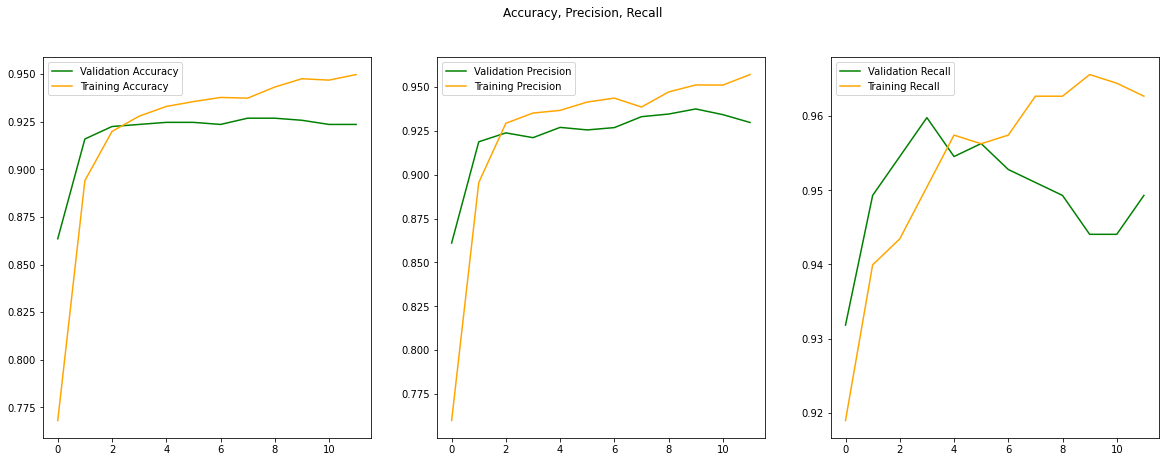

In [95]:
# subplots of accuracy, precision and recall
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols=3, figsize = (20, 7))
fig.suptitle('Accuracy, Precision, Recall')

# axis 1 - accuracy
ax1.plot(history_3_df["val_Accuracy"], label='Validation Accuracy', color='green')
ax1.plot(history_3_df["Accuracy"], label='Training Accuracy', color='orange')
ax1.legend(loc="upper left")
# axis 2 - precision
ax2.plot(history_3_df['val_precision'], label='Validation Precision', color='green')
ax2.plot(history_3_df['precision'], label='Training Precision', color='orange')
ax2.legend(loc="upper left")
# axis3 - recall
ax3.plot(history_3_df['val_recall'], label='Validation Recall', color='green')
ax3.plot(history_3_df['recall'], label='Training Recall', color='orange')
ax3.legend(loc="upper left")

plt.legend();

In [96]:
# evaluate model
model_nn3.evaluate(X_test_sc, y_test, verbose=2)

29/29 - 0s - loss: 0.2178 - Accuracy: 0.9236 - recall: 0.9493 - precision: 0.9298


[0.21783724427223206,
 0.9235807657241821,
 0.9493007063865662,
 0.9297945499420166]

In [97]:
# make predictions
y_pred_nn3=model_nn3.predict(X_test_sc)
y_pred_nn3[:10]

array([[0.61657333],
       [0.7422529 ],
       [0.00528851],
       [0.99462825],
       [0.82629144],
       [0.9712145 ],
       [0.99892044],
       [0.99999714],
       [0.01248455],
       [0.9990944 ]], dtype=float32)

In [98]:
# round predicted values
y_pred_nn3 =y_pred_nn3.round()
y_pred_nn3[:10]

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [99]:
# confusion matrix using Tensorflow
tf.math.confusion_matrix(
    y_test, y_pred_nn3
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[303,  41],
       [ 29, 543]], dtype=int32)>

In [100]:
# classification report
print(classification_report(y_test, y_pred_nn3))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       344
           1       0.93      0.95      0.94       572

    accuracy                           0.92       916
   macro avg       0.92      0.92      0.92       916
weighted avg       0.92      0.92      0.92       916



5. Neural net

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [112]:
# scale data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [113]:
model_nn5 = Sequential()

In [129]:
# create model
model_nn5.add(Dense(32, input_shape=(51,), activation='relu'))
model_nn5.add(Dense(32, activation='relu'))

# model_nn3.add(Dropout(0.1))
# model_nn3.add(Dense(32, activation='relu'))

model_nn5.add(Dense(1, activation='sigmoid'))

# 'dropout': 0.1, 'epochs': 10, 'hidden_layers': 2, 'hidden_neurons': 32

In [118]:
# compile model
model_nn5.compile(loss='bce', optimizer ='adam', metrics = ['Accuracy', 'Recall', 'Precision'])

In [130]:
# fit model
history_5 = model_nn5.fit(
    X_train_sc,
    y_train,
    validation_data=(X_test_sc, y_test),
    epochs=200,
    verbose=0
)

In [131]:
# save history into a df
history_5_df = pd.DataFrame(history_5.history)
history_5_df.head()

,loss,Accuracy,recall,precision,val_loss,val_Accuracy,val_recall,val_precision
0,0.000008,1.0,1.0,1.0,1.412883,0.903930,0.935315,0.912969
1,0.000008,1.0,1.0,1.0,1.418397,0.902838,0.933566,0.912821
2,0.000008,1.0,1.0,1.0,1.426890,0.903930,0.935315,0.912969
3,0.000007,1.0,1.0,1.0,1.433264,0.902838,0.933566,0.912821
4,0.000007,1.0,1.0,1.0,1.445002,0.905022,0.937063,0.913118


In [132]:
history_5_df['val_Accuracy'][5:]

5      0.903930
6      0.903930
7      0.901747
8      0.903930
9      0.902838
         ...   
195    0.906114
196    0.906114
197    0.906114
198    0.906114
199    0.906114
Name: val_Accuracy, Length: 195, dtype: float64

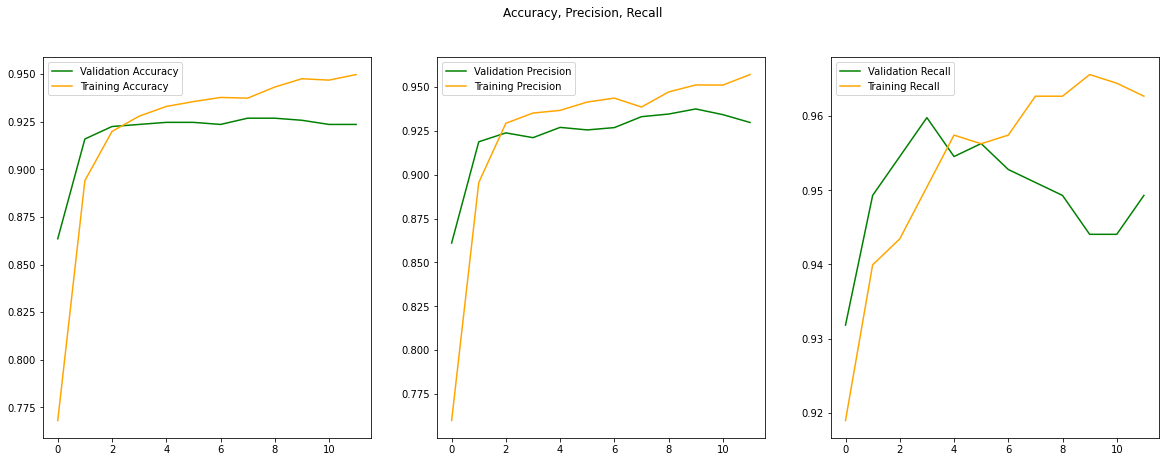

In [137]:
# subplots of accuracy, precision and recall
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols=3, figsize = (20, 7))
fig.suptitle('Accuracy, Precision, Recall')

# axis 1 - accuracy
ax1.plot(history_3_df["val_Accuracy"], label='Validation Accuracy', color='green')
ax1.plot(history_3_df["Accuracy"], label='Training Accuracy', color='orange')
ax1.legend(loc="upper left")
# axis 2 - precision
ax2.plot(history_3_df['val_precision'], label='Validation Precision', color='green')
ax2.plot(history_3_df['precision'], label='Training Precision', color='orange')
ax2.legend(loc="upper left")
# axis3 - recall
ax3.plot(history_3_df['val_recall'], label='Validation Recall', color='green')
ax3.plot(history_3_df['recall'], label='Training Recall', color='orange')
ax3.legend(loc="upper left")

plt.legend();

In [134]:
# evaluate model
model_nn5.evaluate(X_test_sc, y_test, verbose=2)

29/29 - 0s - loss: 1.4750 - Accuracy: 0.9061 - recall: 0.9301 - precision: 0.9204


[1.4749722480773926,
 0.9061135649681091,
 0.9300699234008789,
 0.9204152226448059]

In [135]:
# make predictions
y_pred_nn5=model_nn5.predict(X_test_sc)
y_pred_nn5[:10]

array([[9.9999809e-01],
       [9.9999958e-01],
       [6.4340488e-35],
       [1.0000000e+00],
       [1.6942015e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0125409e-22],
       [1.0000000e+00]], dtype=float32)

In [136]:
# round predicted values
y_pred_nn5 =y_pred_nn5.round()
y_pred_nn5[:10]

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [99]:
# confusion matrix using Tensorflow
tf.math.confusion_matrix(
    y_test, y_pred_nn3
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[303,  41],
       [ 29, 543]], dtype=int32)>

In [138]:
# classification report
print(classification_report(y_test, y_pred_nn5))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       344
           1       0.92      0.93      0.93       572

    accuracy                           0.91       916
   macro avg       0.90      0.90      0.90       916
weighted avg       0.91      0.91      0.91       916



### GridSearch with nn

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# X_train.shape

In [ ]:
# ss = StandardScaler()
# X_train_sc = ss.fit_transform(X_train)
# X_test_sc = ss.transform(X_test)

In [ ]:
# # Add an arugment of number of layers to the function (and loop through it) 
# def model_fn_deep(hidden_neurons, hidden_layers, dropout):
#   model = Sequential()
#   for layer in range(hidden_layers):
#     if layer == 0:
#       model.add(Dense(hidden_neurons, input_shape=(51,), activation='relu'))
#       model.add(Dropout(dropout))
#     else:
#       model.add(Dense(hidden_neurons, activation='relu'))
#       model.add(Dropout(dropout))

#   model.add(Dense(1, activation='sigmoid'))

#   model.compile(loss='bce', optimizer='adam', metrics =['Accuracy','Recall', 'Precision'])

#   return model

# nn_deep = KerasClassifier(build_fn=model_fn_deep, verbose=2)

In [ ]:
# nn_params_deep = {
#     'hidden_neurons': [32, 64, 128],
#     'hidden_layers': [2, 3],
#     'dropout': [0.1, 0.2, 0.5],
#     'epochs': [10, 20, 30]
# }

# gs_deep = GridSearchCV(nn_deep, param_grid=nn_params_deep, cv=3, n_jobs=-1)
# gs_deep.fit(X_train_sc, y_train)
# print(gs_deep.best_params_)
# gs_deep.best_score_

In [ ]:
# # Make predictions 
# preds_deep = gs_deep.predict(X_test_sc)

In [ ]:
# # confusion matrix using Tensorflow
# tf.math.confusion_matrix(
#     y_test, preds_deep
# )

In [ ]:
# # classification report
# print(classification_report(y_test, preds_deep))